In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('../1_Z-Score_Filtering/placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9020\1282200442.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9020\1282200442.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

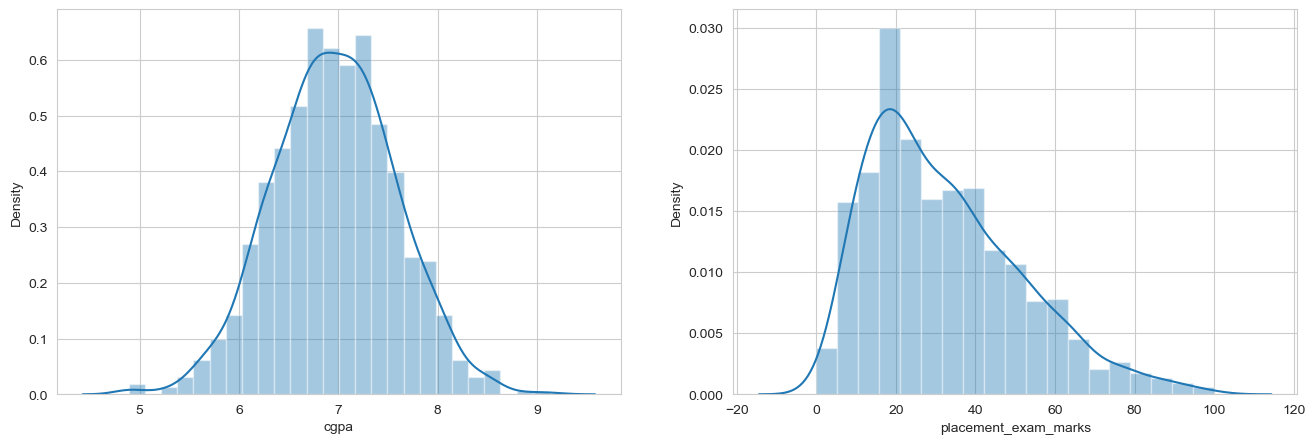

In [15]:
plt.figure(figsize=(16,5))

plt.subplot(121)
sns.distplot(df['cgpa'])

plt.subplot(122)
sns.distplot(df['placement_exam_marks'])

In [16]:
df['cgpa'].skew()

-0.014529938929314918

In [17]:
df['placement_exam_marks'].skew()

0.8356419499466834

#### boxplot

<Axes: >

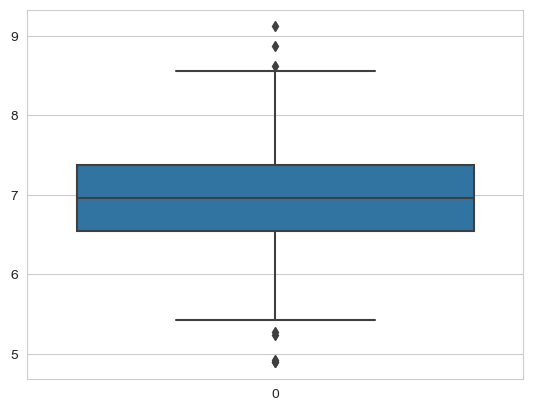

In [18]:
sns.boxplot(df['cgpa'])

<Axes: >

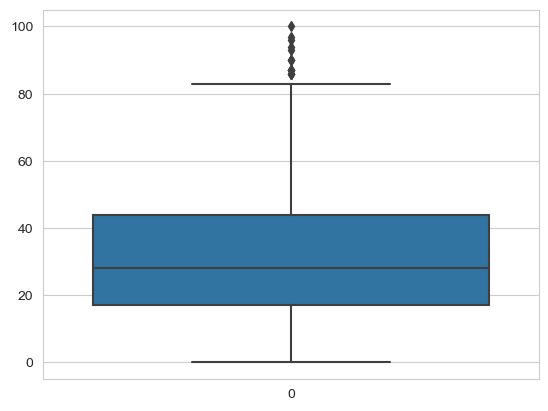

In [19]:
sns.boxplot(df['placement_exam_marks'])

# Finding IQR

In [20]:
marks_percentile25 = df['placement_exam_marks'].quantile(0.25)
marks_percentile75 = df['placement_exam_marks'].quantile(0.75)

In [21]:
marks_percentile25, marks_percentile75

(17.0, 44.0)

In [22]:
iqr = marks_percentile75 - marks_percentile25
iqr

27.0

In [29]:
marks_upper_limit = marks_percentile75 + 1.5 * iqr
marks_lower_limit = marks_percentile25 - 1.5 * iqr
marks_lower_limit, marks_upper_limit

(-23.5, 84.5)

# Finding outlier

In [30]:
df[df['placement_exam_marks'] > marks_upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [31]:
df[df['placement_exam_marks'] < marks_lower_limit]

,cgpa,placement_exam_marks,placed


### Trim

In [33]:
df_trim = df[(df['placement_exam_marks'] < marks_upper_limit) & (df['placement_exam_marks'] > marks_lower_limit)]
df_trim

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9020\1827451077.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9020\1827451077.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-le

Text(0.5, 1.0, 'Marks After trimming')

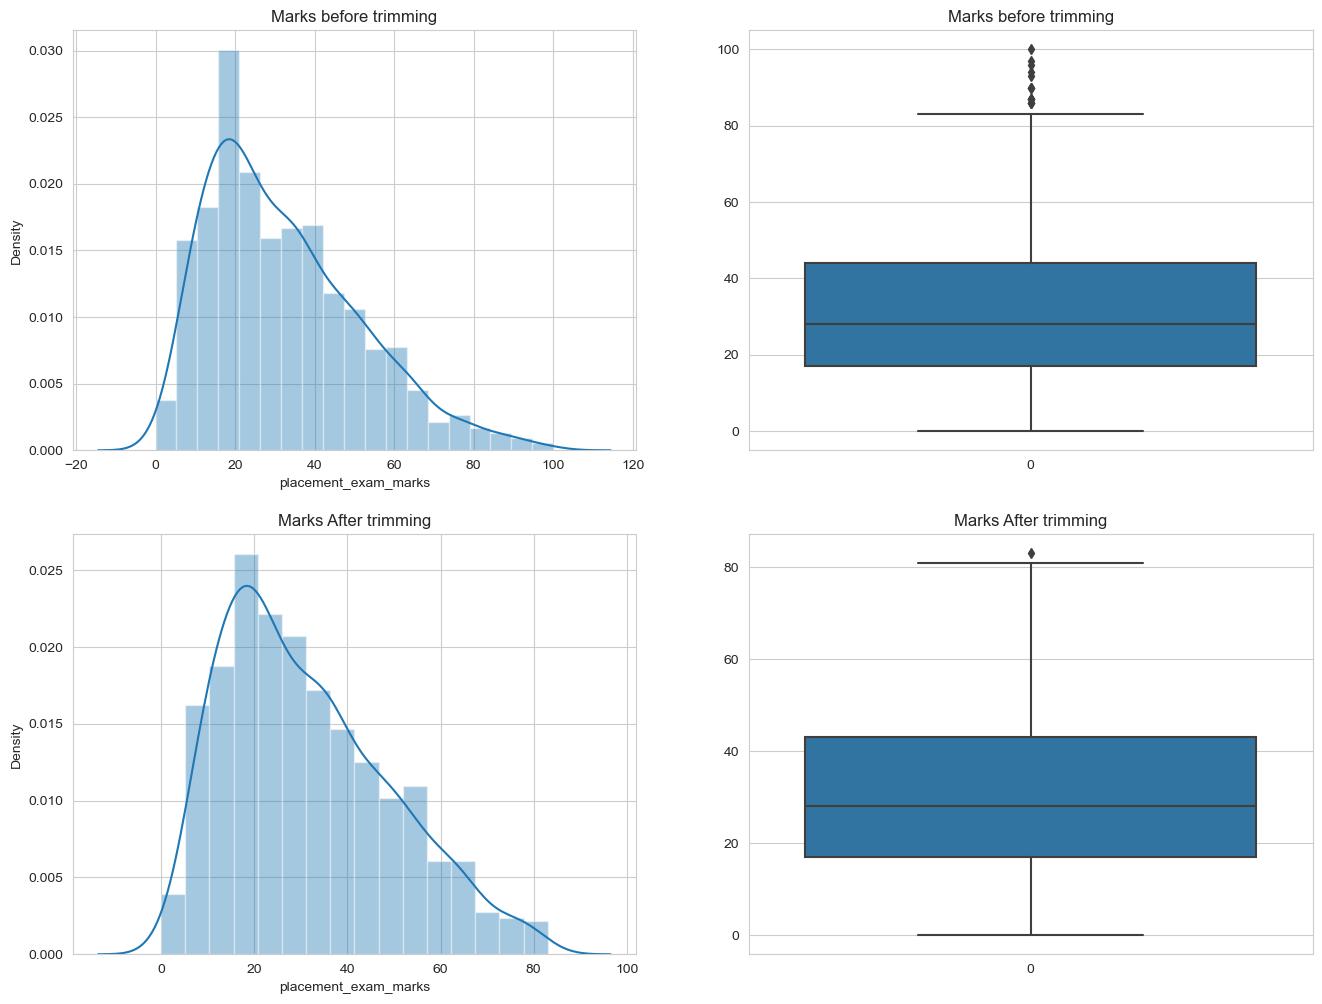

In [38]:
plt.figure(figsize=(16,12))

plt.subplot(221)
sns.distplot(df['placement_exam_marks'])
plt.title('Marks before trimming')

plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])
plt.title('Marks before trimming')

plt.subplot(223)
sns.distplot(df_trim['placement_exam_marks'])
plt.title('Marks After trimming')

plt.subplot(224)
sns.boxplot(df_trim['placement_exam_marks'])
plt.title('Marks After trimming')

### capping

In [40]:
df_cap = df.copy()

df_cap['placement_exam_marks'] = np.where(
    df_cap['placement_exam_marks'] > marks_upper_limit,
    marks_upper_limit,
    np.where(
        df_cap['placement_exam_marks'] < marks_lower_limit,
        marks_lower_limit,
        df_cap['placement_exam_marks']
    )
)
df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9020\438531577.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_9020\438531577.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-leve

Text(0.5, 1.0, 'Marks After capping')

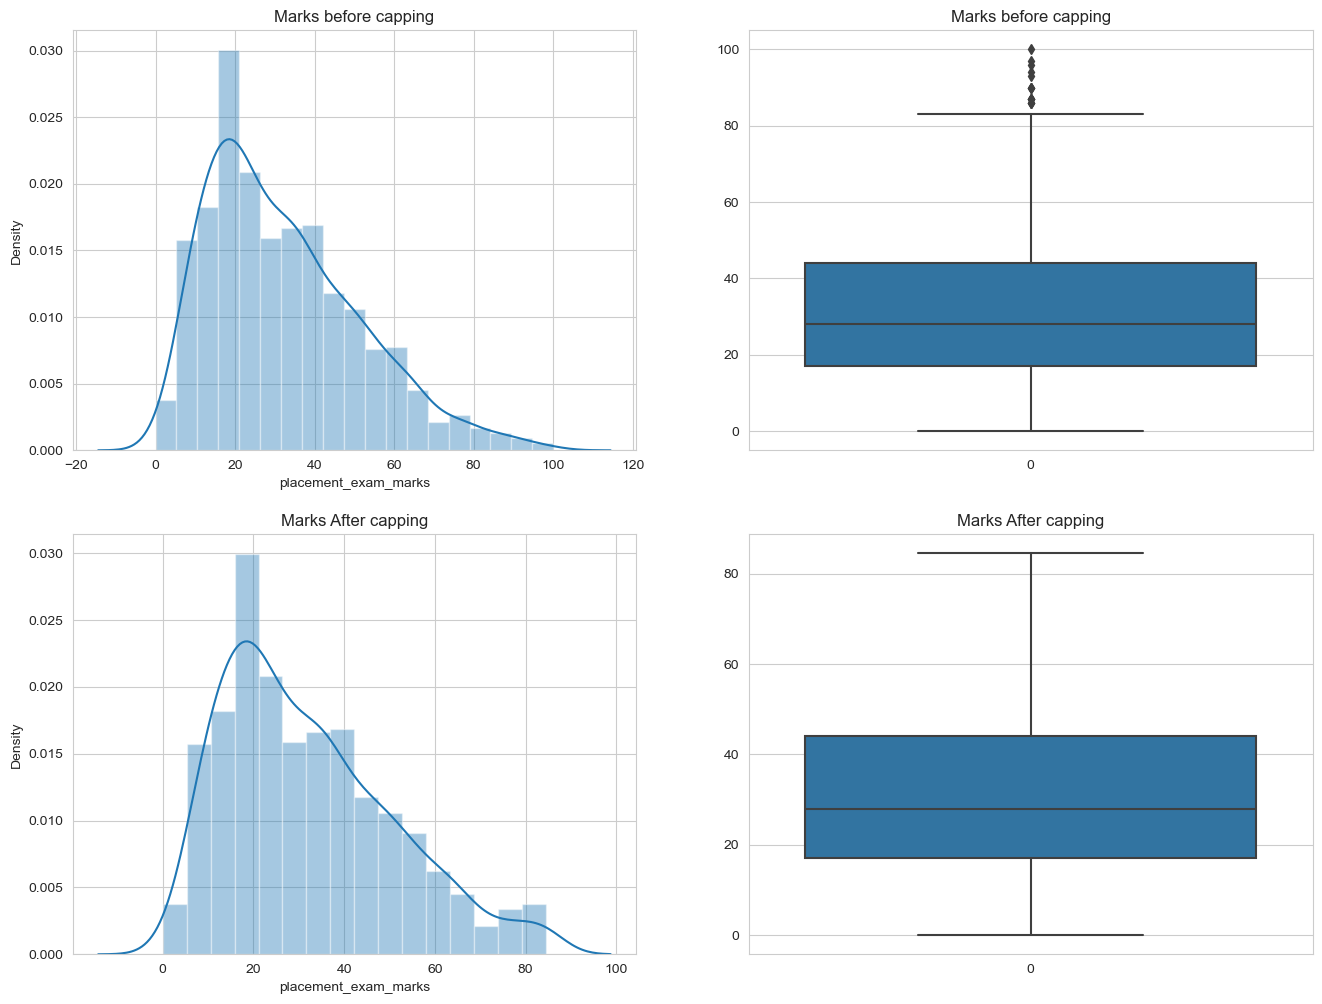

In [41]:
plt.figure(figsize=(16,12))

plt.subplot(221)
sns.distplot(df['placement_exam_marks'])
plt.title('Marks before capping')

plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])
plt.title('Marks before capping')

plt.subplot(223)
sns.distplot(df_cap['placement_exam_marks'])
plt.title('Marks After capping')

plt.subplot(224)
sns.boxplot(df_cap['placement_exam_marks'])
plt.title('Marks After capping')